## Задание 1



### Система условий:

Для нахождения коэффициентов многочлена $ P_3(x) $, нужно составить систему условий, которые должны быть выполнены для этого многочлена, исходя из данных $ f(0), f(1), f'(0), f'(1) $.

1. **Условие для функции в точке $ x = 0 $**:
   $$
   f(0) = a_0
   $$

2. **Условие для функции в точке $ x = 1 $**:
   $$
   f(1) = a_0 + a_1 + a_2 + a_3
   $$

3. **Условие для производной в точке $ x = 0 $**:
   $$
   f'(0) = a_1
   $$

4. **Условие для производной в точке $ x = 1 $**:
   $$
   f'(1) = a_1 + 2a_2 + 3a_3
   $$

### Решение системы:

Имея эти 4 уравнения, можно решить систему относительно коэффициентов $ a_0, a_1, a_2, a_3 $. Каждое из уравнений обеспечивает нужные условия для значения функции и её производной в точках 0 и 1. Рассмотрим, как можно решить эту систему:

1. Из первого уравнения получаем:
   $$
   a_0 = f(0)
   $$

2. Из второго уравнения:
   $$
   f(1) = a_0 + a_1 + a_2 + a_3 \quad \Rightarrow \quad f(1) = f(0) + a_1 + a_2 + a_3
   $$
   Таким образом:
   $$
   a_1 + a_2 + a_3 = f(1) - f(0)
   $$

3. Из третьего уравнения:
   $$
   a_1 = f'(0)
   $$

4. Из четвёртого уравнения:
   $$
   f'(1) = a_1 + 2a_2 + 3a_3 \quad \Rightarrow \quad f'(1) = f'(0) + 2a_2 + 3a_3
   $$
   Таким образом:
   $$
   2a_2 + 3a_3 = f'(1) - f'(0)
   $$

Теперь, имея систему из 4 уравнений для 4 неизвестных $ a_0, a_1, a_2, a_3 $, мы можем решить её, подставив известные значения $ f(0), f(1), f'(0), f'(1) $.

### Пример:

Предположим, у нас есть следующие данные:

- $ f(0) = 2 $
- $ f(1) = 3 $
- $ f'(0) = 1 $
- $ f'(1) = 0 $

Тогда система уравнений будет выглядеть следующим образом:

$$
a_0 = 2
$$
$$
a_1 + a_2 + a_3 = 3 - 2 = 1
$$
$$
a_1 = 1
$$
$$
2a_2 + 3a_3 = 0 - 1 = -1
$$

Теперь, подставив $ a_1 = 1 $ в другие уравнения, мы получим:

$$
a_2 + a_3 = 0
$$
$$
2a_2 + 3a_3 = -1
$$

Решая эту систему, получим:

$$
a_2 = 1, \quad a_3 = -1
$$

Таким образом, искомый интерполяционный многочлен будет:

$$
P_3(x) = 2 + x + x^2 - x^3
$$

Этот многочлен будет интерполировать данные $ f(0), f(1), f'(0), f'(1) $.

### Реализация решения:

In [1]:
import numpy as np

def hermite_interpolation(f0, f1, df0, df1):
    # Составляем систему уравнений для коэффициентов многочлена
    # Система:
    # a0 = f(0)
    # a1 + a2 + a3 = f(1) - f(0)
    # a1 = f'(0)
    # 2a2 + 3a3 = f'(1) - f'(0)

    # Инициализация коэффициентов
    a0 = f0
    a1 = df0
    # Решаем систему для a2 и a3
    # 1. a1 + a2 + a3 = f1 - f0
    # 2. 2a2 + 3a3 = df1 - df0
    
    # Подставляем a1 = df0 в первую и вторую формулу
    # Получаем систему для a2 и a3:
    # a2 + a3 = f1 - f0 - a1
    # 2a2 + 3a3 = df1 - df0

    A = np.array([[1, 1], [2, 3]])
    B = np.array([f1 - f0 - a1, df1 - df0])

    # Решаем систему линейных уравнений для a2 и a3
    a2, a3 = np.linalg.solve(A, B)
    
    # Вернем все коэффициенты
    return a0, a1, a2, a3

# Пример использования:
f0 = 2    # f(0)
f1 = 3    # f(1)
df0 = 1   # f'(0)
df1 = 0   # f'(1)

# Получаем коэффициенты
a0, a1, a2, a3 = hermite_interpolation(f0, f1, df0, df1)

# Строим интерполяционный многочлен
def P3(x):
    return a0 + a1*x + a2*x**2 + a3*x**3

# Печать коэффициентов
print(f"Коэффициенты многочлена: a0 = {a0}, a1 = {a1}, a2 = {a2}, a3 = {a3}")

# Пример вычисления значения многочлена для x = 0.5
x_val = 0.5
print(f"P3({x_val}) = {P3(x_val)}")


Коэффициенты многочлена: a0 = 2, a1 = 1, a2 = 1.0, a3 = -1.0
P3(0.5) = 2.625


## Задание 2

2.1 показываю влияние производных на поведение многочлена

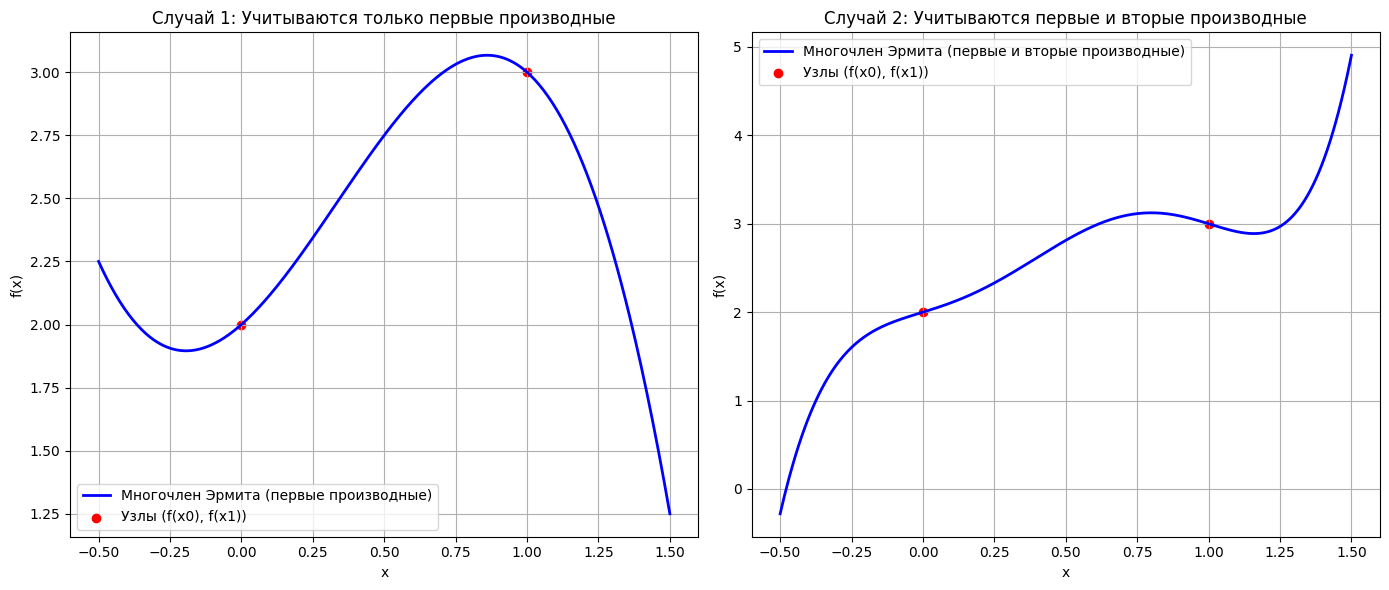

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для вычисления коэффициентов многочлена Эрмита
def hermite_interpolation(f0, f1, df0, df1, d2f0=0, d2f1=0, use_second_derivatives=False):
    x0, x1 = 0, 1  # Узлы
    h = x1 - x0

    if use_second_derivatives:
        # Матрица для случая с первыми и вторыми производными (пятый порядок)
        A = np.array([
            [1, 0, 0, 0, 0, 0],            # P(x0) = f0
            [0, 1, 0, 0, 0, 0],            # P'(x0) = df0
            [0, 0, 2, 0, 0, 0],            # P''(x0) = d2f0
            [1, h, h**2, h**3, h**4, h**5],  # P(x1) = f1
            [0, 1, 2*h, 3*h**2, 4*h**3, 5*h**4],  # P'(x1) = df1
            [0, 0, 2, 6*h, 12*h**2, 20*h**3]  # P''(x1) = d2f1
        ])
        B = np.array([f0, df0, d2f0, f1, df1, d2f1])
    else:
        # Матрица для случая с первыми производными (третий порядок)
        A = np.array([
            [1, 0, 0, 0],            # P(x0) = f0
            [0, 1, 0, 0],            # P'(x0) = df0
            [1, h, h**2, h**3],      # P(x1) = f1
            [0, 1, 2*h, 3*h**2]      # P'(x1) = df1
        ])
        B = np.array([f0, df0, f1, df1])

    # Решаем систему уравнений
    return np.linalg.solve(A, B)

# Узлы
f0, f1 = 2, 3
df0, df1 = 1, -1
d2f0, d2f1 = 0.5, -0.5  # Используется только для второго случая

# Коэффициенты многочленов
coefficients_1 = hermite_interpolation(f0, f1, df0, df1, use_second_derivatives=False)
coefficients_2 = hermite_interpolation(f0, f1, df0, df1, d2f0, d2f1, use_second_derivatives=True)

# Массив x для построения графиков
x_vals = np.linspace(-0.5, 1.5, 400)

# Значения многочленов
P3 = lambda x: sum(c * (x ** i) for i, c in enumerate(coefficients_1))  # Третий порядок
P5 = lambda x: sum(c * (x ** i) for i, c in enumerate(coefficients_2))  # Пятый порядок

y_vals_1 = P3(x_vals)
y_vals_2 = P5(x_vals)

# Построение графиков
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Первый график: только первые производные
axes[0].plot(x_vals, y_vals_1, label="Многочлен Эрмита (первые производные)", color="blue", linewidth=2)
axes[0].scatter([0, 1], [f0, f1], color="red", label="Узлы (f(x0), f(x1))")
axes[0].set_title("Случай 1: Учитываются только первые производные")
axes[0].legend()
axes[0].grid(True)

# Второй график: с учётом первых и вторых производных
axes[1].plot(x_vals, y_vals_2, label="Многочлен Эрмита (первые и вторые производные)", color="blue", linewidth=2)
axes[1].scatter([0, 1], [f0, f1], color="red", label="Узлы (f(x0), f(x1))")
axes[1].set_title("Случай 2: Учитываются первые и вторые производные")
axes[1].legend()
axes[1].grid(True)

# Общие настройки
for ax in axes:
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")

plt.tight_layout()
plt.show()


2.2 Кусочное интерполирование функции

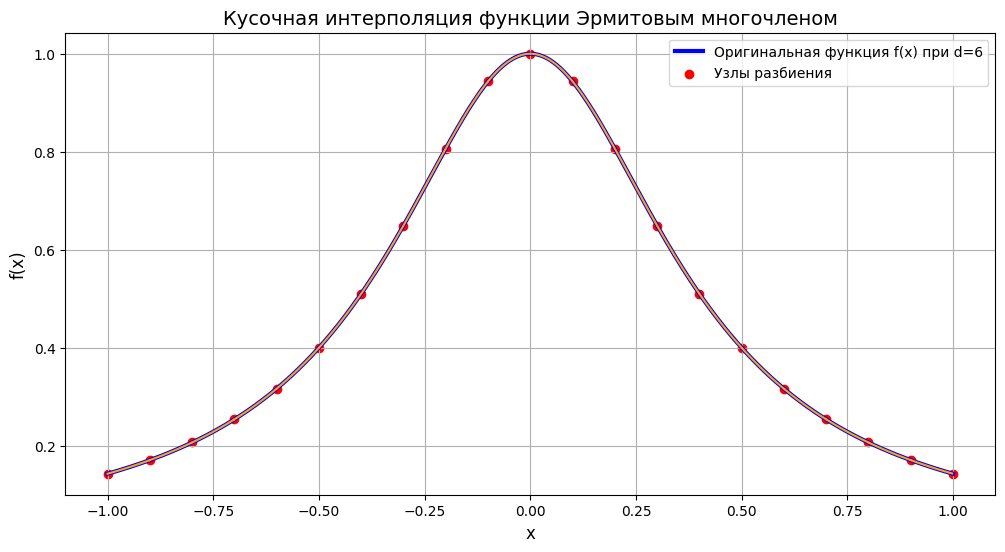

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, d):
    return 1 / (1 + d * x**2)

def f_prime(x, d):
    return -2 * d * x / (1 + d * x**2)**2

def hermite_cubic(a, b, fa, fb, fpa, fpb, x):
    h = b - a
    k = (x - a) / h
    term1 = (1 - 3 * k**2 + 2 * k**3) * fa
    term2 = (3 * k**2 - 2 * k**3) * fb
    term3 = h * (k - 2 * k**2 + k**3) * fpa
    term4 = h * (-k**2 + k**3) * fpb
    return term1 + term2 + term3 + term4

# Параметры
k = 1  # Можно варьировать от 1 до 20
d = 5 + k
x_range = np.arange(-1, 1.1, 0.1)  # Узлы разбиения с шагом 0.1

# Вычисляем значения функции и её производной в узлах
f_values = f(x_range, d)
f_prime_values = f_prime(x_range, d)

# Генерируем график кусочной интерполяции
x_dense = np.linspace(-1, 1, 1000)  # Плотный диапазон для отображения интерполяции
y_interp = []

for i in range(len(x_range) - 1):
    a, b = x_range[i], x_range[i + 1]
    fa, fb = f_values[i], f_values[i + 1]
    fpa, fpb = f_prime_values[i], f_prime_values[i + 1]

    # Интерполяция на текущем участке
    x_section = x_dense[(x_dense >= a) & (x_dense <= b)]
    y_section = hermite_cubic(a, b, fa, fb, fpa, fpb, x_section)
    y_interp.append((x_section, y_section))

# Построение графиков
plt.figure(figsize=(12, 6))

# Оригинальная функция
plt.plot(x_dense, f(x_dense, d), label=f"Оригинальная функция f(x) при d={d}", color="blue", linewidth=3)

# Интерполированная функция
for x_section, y_section in y_interp:
    plt.plot(x_section, y_section, color="orange", linewidth=1.5)

# Узлы разбиения
plt.scatter(x_range, f_values, color="red", label="Узлы разбиения")

# Настройки графика
plt.title("Кусочная интерполяция функции Эрмитовым многочленом", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("f(x)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()
